In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx

# Clos

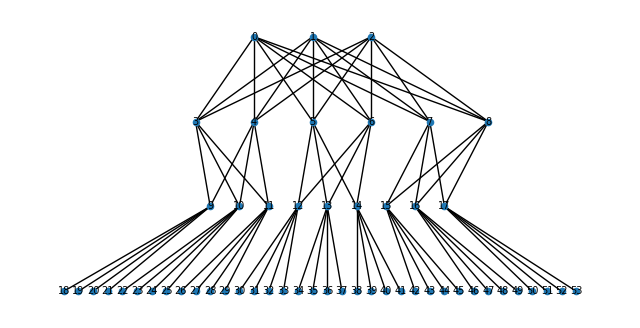

In [15]:
# only need to change this
n = 6 # starts from 4
######
bandwidth = 2
num_ToR = 4 # number of qpus per rack
num_core = n // 2
num_agg = n
num_edge = n**2 // 4
num_nodes = num_edge * num_ToR # number of q nodes

num_bsm_agg = 2
num_bsm_edge = 2
num_pd = 1
num_laser = 1
num_bs = 1
num_es = 1

num_vertices = num_core + num_agg + num_edge + num_nodes
core_bw = 4*bandwidth
agg_bw = 2*bandwidth
edge_bw = bandwidth

G = nx.Graph()
## adding node attributes
# "PD", "BSM", "Laser", "BS", "ES"
attrs = {}

core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
for core in core_switches:
    attrs[core] = {"PD": 0, "BSM_ir":0, "BSM_tel":0, "Laser":0, "BS":0, "ES":0}
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
for agg in agg_switches:
    attrs[agg] = {"PD": 0, "BSM_ir":0, "BSM_tel":num_bsm_agg, "Laser":0, "BS":0, "ES":0}
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='edge')
for edge in edge_switches:
    attrs[edge] = {"PD": num_pd, "BSM_ir": num_bsm_edge, "BSM_tel":0, "Laser": num_laser, "BS": num_bs, "ES": num_es}
node_list = range(num_core + num_agg + num_edge,num_vertices)
G.add_nodes_from(node_list, type='node')
nx.set_node_attributes(G, attrs)

for core in core_switches:
    for agg in agg_switches:
        G.add_edge(core,agg, weight=core_bw)

new_edges = []
extra_edges = []
agg_conn = np.ones(num_agg)* (n//2)
for i, edge in enumerate(edge_switches):
    i1 = np.argwhere(agg_conn>0)[0,0]
    G.add_edge(edge,agg_switches[i1], weight=agg_bw)
    agg_conn[i1] -= 1 
    G.add_edge(edge,agg_switches[i1+1], weight=agg_bw)
    agg_conn[i1+1] -= 1 

for i, edge in enumerate(edge_switches):
    for j in range(num_ToR):
        G.add_edge(edge,node_list[num_ToR*i+j], weight=edge_bw)

shift = 3.5
pos_core = {i: (3*shift+4*i ,2) for i in core_switches}
pos_agg = {i: (3*shift+4*(((i-n//2)% n)-1),1) for i in agg_switches}
pos_edge = {i: (3*shift+2*i-3.5*n,0) for i in edge_switches}
pos_nodes = {node: (shift+i-n,-1) for i, node in enumerate(node_list)}
pos = pos_core | pos_agg | pos_edge | pos_nodes 

fig, ax = plt.subplots(figsize=(8,4))

nx.draw(G, pos, node_size=20, font_size=7, with_labels=True)
plt.show()